<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/An%C3%A1lise_de_dados_de_vacina%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dados de vacinação do Open DataSUS

https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8



In [1]:
!mkdir -p "/content/drive/MyDrive/Colab Datasets/vacina-covid"

In [2]:
!wget -P "/content/drive/MyDrive/Colab Datasets/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-24/uf%3DAM/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv

--2021-04-24 20:30:48--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-24/uf%3DAM/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.163.43
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.163.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363641587 (347M) [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv’

part-00000-5bff8028 100%[===================>] 346.79M  20.1MB/s    in 19s     

2021-04-24 20:31:08 (18.2 MB/s) - ‘/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv’ saved [363641587/363641587]



In [24]:
import pandas as pd
import seaborn as sns

In [25]:
sns.set()

In [5]:
vacina_AM = pd.read_csv('/content/drive/MyDrive/Colab Datasets/vacina-covid/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv', sep=';')

In [7]:
vacina_AM.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,9f4fbc68-b38e-4d2d-a5e8-4ec9ffcebcae-i0b0,94847eed45709bf249984cabd45c3fafe68d4bce9cf559...,69,1951-08-15,M,3,PARDA,130185.0,10.0,IRANDUBA,BRASIL,AM,69415.0,B,2016702,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF DR LUIZ MONTENEGRO,130260,MANAUS,AM,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,4120Z025,University of Oxford/AstraZeneca,NaN,2021-03-11T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,SMV,2021-03-13 12:24:30,18183
1,b7e1b1b1-6806-4f63-a888-7f5fc29cd236-i0b0,67889172bb3c5b17aae57eae3c79170c73aa28ca49869f...,75,1945-09-12,M,4,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,NaN,B,2015323,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MANSOUR BULBOL,130260,MANAUS,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,University of Oxford/AstraZeneca,NaN,2021-02-04T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,SMV,2021-02-19 19:06:41,18183
2,766535ad-3693-4e2a-b065-801b01be5d86-i0b0,56606bd5865bb7a2a4c5e60e04fe136406b1bc89a7a8e5...,47,1973-06-12,F,99,SEM INFORMACAO,130260.0,10.0,MANAUS,BRASIL,AM,69048.0,NaN,3596362,PREFEITURA MUNICIPAL DE AUTAZES,UNIDADE BASICA DE SAUDE DANILO CORREA,130030,AUTAZES,AM,602,Ribeirinha,6.0,Povos e Comunidades Tradicionais,212VCD001ZVB,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-31T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-13 20:48:28,16341
3,eaac99b8-7e65-4f41-9147-89f4fbaab91e-i0b0,ae92bdd5452846a9c22606f66296d21d0f37d9d91004e7...,39,1981-06-16,F,5,INDIGENA,130340.0,10.0,PARINTINS,BRASIL,AM,69151.0,B,7389663,SECRETARIA ESPECIAL DE SAUDE INDIGENA,POLO BASE NOVA ALEGRIA,130340,PARINTINS,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-26T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-22 14:55:37,16341
4,9197a1be-2e84-420a-b9fb-dee21e17b8a0-i0b0,8a76482afe6f0b16bb8a79cfe26f7e14e2372357d4747b...,54,1966-03-06,M,3,PARDA,130260.0,10.0,MANAUS,BRASIL,AM,69089.0,B,2015323,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MANSOUR BULBOL,130260,MANAUS,AM,926,Outros,9.0,Trabalhadores de Saúde,210012,Butantan/Sinovac,NaN,2021-03-02T00:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-04-19 20:33:39,18183


In [8]:
vacina_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682321 entries, 0 to 682320
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               682321 non-null  object 
 1   paciente_id                               682321 non-null  object 
 2   paciente_idade                            682321 non-null  int64  
 3   paciente_dataNascimento                   682321 non-null  object 
 4   paciente_enumSexoBiologico                682321 non-null  object 
 5   paciente_racaCor_codigo                   682321 non-null  int64  
 6   paciente_racaCor_valor                    682321 non-null  object 
 7   paciente_endereco_coIbgeMunicipio         675216 non-null  float64
 8   paciente_endereco_coPais                  675259 non-null  float64
 9   paciente_endereco_nmMunicipio             675238 non-null  object 
 10  paciente_endereco_nm

In [17]:
vacina_AM.describe(include='all')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,682321,682321,682321.00000,682321,682321,682321.000000,682321,675216.000000,675259.000000,675238,675259,675216,556241.000000,681911,6.823210e+05,682321,682321,682321.000000,682321,682321,682321.000000,667865,667865.000000,667865,682321,682321,257637,682321,682321,682321.000000,682321,682321,682321,682321.000000
unique,682245,510994,NaN,29458,2,NaN,6,NaN,NaN,1719,7,28,NaN,3,NaN,135,435,NaN,62,1,NaN,66,NaN,14,81,9,3,188,3,NaN,5,3,228228,NaN
top,7dea012d-23a9-4e43-be69-2c14b79212b0-i0b0,7bae8c7b7e20d47db6a5238605a351e328452f908fa316...,NaN,1960-01-01,F,NaN,PARDA,NaN,NaN,MANAUS,BRASIL,AM,NaN,B,NaN,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF DR LUIZ MONTENEGRO,NaN,MANAUS,AM,NaN,Pessoas de 60 a 64 anos,NaN,Faixa Etária,202010025,Butantan/Sinovac,Organization/61189445000156,2021-02-08T00:00:00.000Z,1ª Dose,NaN,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-04-19 20:33:39,NaN
freq,2,5,NaN,148,370647,NaN,296310,NaN,NaN,391336,675237,648794,NaN,676566,NaN,371199,122889,NaN,408158,682321,NaN,128970,NaN,314557,127832,274554,175597,16175,510692,NaN,463430,402179,18065,NaN
mean,NaN,NaN,54.30498,NaN,NaN,23.122907,NaN,134003.010524,10.005314,NaN,NaN,NaN,68949.365636,NaN,3.166808e+06,NaN,NaN,130247.463239,NaN,NaN,451.378637,NaN,4.540292,NaN,NaN,NaN,NaN,NaN,NaN,85.694200,NaN,NaN,NaN,17501.300684
std,NaN,NaN,17.57767,NaN,NaN,38.846472,NaN,30780.014887,1.008633,NaN,NaN,NaN,5257.471310,NaN,2.077503e+06,NaN,NaN,86.129803,NaN,NaN,326.131648,NaN,3.172695,NaN,NaN,NaN,NaN,NaN,NaN,0.507165,NaN,NaN,NaN,906.765757
min,NaN,NaN,0.00000,NaN,NaN,1.000000,NaN,110001.000000,10.000000,NaN,NaN,NaN,0.000000,NaN,7.089000e+04,NaN,NaN,130002.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,16341.000000
25%,NaN,NaN,40.00000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69053.000000,NaN,2.013916e+06,NaN,NaN,130260.000000,NaN,NaN,201.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,16341.000000
50%,NaN,NaN,60.00000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69093.000000,NaN,2.016702e+06,NaN,NaN,130260.000000,NaN,NaN,204.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,18183.000000
75%,NaN,NaN,66.00000,NaN,NaN,5.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69415.000000,NaN,3.441784e+06,NaN,NaN,130260.000000,NaN,NaN,701.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,18183.000000


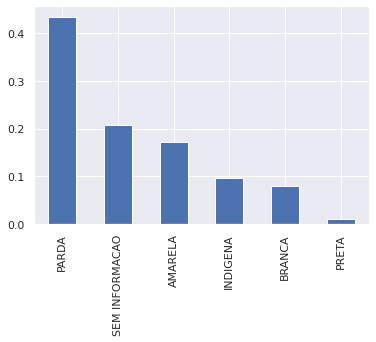

In [26]:
vacina_AM.paciente_racaCor_valor.value_counts(normalize=True).plot(kind='bar')

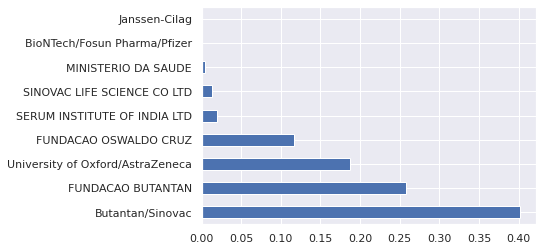

In [72]:
vacina_AM.vacina_fabricante_nome.value_counts(normalize=True).plot(kind='barh')

In [20]:
vacina_AM.groupby(['paciente_idade','vacina_grupoAtendimento_nome']).count().head(40)

document_id  ...  id_sistema_origem
paciente_idade vacina_grupoAtendimento_nome                                     ...                   
0              Enfermeiro(a)                                                 1  ...                  1
               Povos indígenas em terras indígenas                           2  ...                  2
1              Povos indígenas em terras indígenas                           1  ...                  1
2              Pessoas de 70 a 74 anos                                       1  ...                  1
               Povos indígenas em terras indígenas                           2  ...                  2
3              Pessoal da Limpeza                                            2  ...                  2
               Povos indígenas em terras indígenas                           2  ...                  2
4              Pessoas de 70 a 74 anos                                       1  ...                  1
               Povos indígenas em terras indígenas                           3  ...                  3
6              Enfermeiro(a)                                                 1  ...                  1
               Povos indígenas em terras indígenas                           1  ...                  1
7              Hipertensão de difícil controle ou com complica...            1  ...                  1
               Povos indígenas em terras indígenas                           1  ...                  1
8              Diabetes Mellitus                                             1  ...                  1
               Pessoas de 65 a 69 anos                                       1  ...                  1
               Povos indígenas em terras indígenas                           4  ...                  4
9              Povos indígenas em terras indígenas                           4  ...                  4
12             Pessoas de 60 a 64 anos                                       1  ...                  1
               Pessoas de 65 a 69 anos                                       1  ...                  1
               Pessoas de 80 anos ou mais                                    1  ...                  1
               Povos indígenas em terras indígenas                           4  ...                  4
               Síndrome de Down                                              1  ...                  1
13             Pessoas de 65 a 69 anos                                       1  ...                  1
               Pessoas de 75 a 79 anos                                       1  ...                  1
               Povos indígenas em terras indígenas                           5  ...                  5
14             Pessoas com Deficiência Institucionalizadas                   1  ...                  1
               Povos indígenas em terras indígenas                           7  ...                  7
15             Guarda Municipal                                              1  ...                  1
               Outros                                                        1  ...                  1
               Pessoas de 60 a 64 anos                                       1  ...                  1
               Pessoas de 65 a 69 anos                                       1  ...                  1
               Pessoas de 70 a 74 anos                                       2  ...                  2
               Povos indígenas em terras indígenas                          11  ...                 11
               Terapeuta Ocupacional                                         2  ...                  2
               Técnico de Enfermagem                                         1  ...                  1
16             Outros                                                       22  ...                 22
               Povos indígenas em terras indígenas                           5  ...                  5
               Ribeirinha                         

In [28]:
vacina_AM[vacina_AM.paciente_idade == 0]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
357423,2b7b810a-a9db-44e6-9b11-532689706e87-i0b0,a0948b4724276636cf0a1ae2de1c91cbaac8f04f8d79fc...,0,2021-01-27,M,1,BRANCA,354980.0,10.0,SAO JOSE DO RIO PRETO,BRASIL,SP,15052.0,B,7671660,DISTRITO SANITARIO ESPECIAL INDIGINA MEDIO SOL...,POLO BASE BUA BUA,130210,JAPURA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-27T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-11 15:28:23,16341
437326,93199867-3df0-417e-9e19-3f6d60ec7245-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0,2021-03-08,F,3,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,202010028,SERUM INSTITUTE OF INDIA LTD,NaN,2021-04-06T00:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-04-08 10:00:02,18602
543031,2e3b954e-0941-425f-8d04-0d543639736c-i0b0,d210979e44ed295f04d7b5f5f5f7f0f33d62fadeb5a8eb...,0,2020-07-26,M,5,INDIGENA,130060.0,10.0,BENJAMIN CONSTANT,BRASIL,AM,69630.0,B,5480000,DISTRITO SANITARIO ESPECIAL DE SAUDE INDIGENA ...,POLO BASE FILADELFIA,130060,BENJAMIN CONSTANT,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-28T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-11 21:33:06,16341
635228,b6210a5e-c6e8-49e2-903f-71dcaaecfa90-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0,2021-03-08,F,3,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,0,NaN,NaN,NaN,200278,SERUM INSTITUTE OF INDIA LTD,NaN,2021-03-08T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-18 12:45:03,18602


In [33]:
vacina_AM.vacina_dataAplicacao = pd.to_datetime(vacina_AM.vacina_dataAplicacao)

In [49]:
vacina_AM.vacina_dataAplicacao.sort_values()

90329    2021-01-01 00:00:00+00:00
511236   2021-01-02 00:00:00+00:00
328753   2021-01-02 00:00:00+00:00
328751   2021-01-02 00:00:00+00:00
206668   2021-01-02 00:00:00+00:00
                    ...           
340692   2021-04-23 03:00:00+00:00
345098   2021-04-23 03:00:00+00:00
344210   2021-04-23 03:00:00+00:00
344106   2021-04-23 03:00:00+00:00
340432   2021-04-23 03:00:00+00:00
Name: vacina_dataAplicacao, Length: 682321, dtype: datetime64[ns, UTC]

In [78]:
vacina_AM['vacina_dataAplicacao_date'] = vacina_AM.vacina_dataAplicacao
vacina_AM['vacina_dataAplicacao_weekofyear'] = vacina_AM.vacina_dataAplicacao.dt.isocalendar().week
vacina_AM['vacina_dataAplicacao_month'] = vacina_AM.vacina_dataAplicacao.dt.month

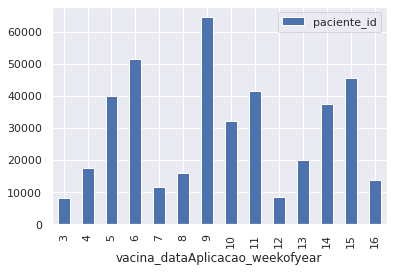

In [68]:
vacina_AM[vacina_AM.estabelecimento_municipio_nome=='MANAUS'].groupby(['vacina_dataAplicacao_weekofyear']).agg({'paciente_id':'count'}).plot(kind='bar')

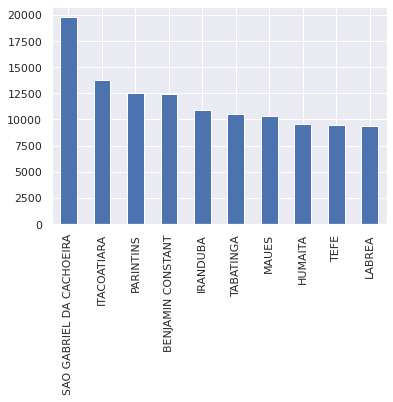

In [67]:
vacina_AM.estabelecimento_municipio_nome.value_counts()[1:].head(10).plot(kind='bar')

In [77]:
vacina_AM.vacina_grupoAtendimento_nome.value_counts(normalize=True)

Pessoas de 60 a 64 anos                            0.193108
Povos indígenas em terras indígenas                0.137023
Pessoas de 65 a 69 anos                            0.105457
Outros                                             0.101869
Pessoas de 70 a 74 anos                            0.072170
                                                     ...   
Bombeiro Civil                                     0.000025
Anemia Falciforme                                  0.000015
Trabalhadores Portuários                           0.000010
Funcionário do Sistema de Privação de Liberdade    0.000010
Trabalhadores Industriais                          0.000001
Name: vacina_grupoAtendimento_nome, Length: 66, dtype: float64

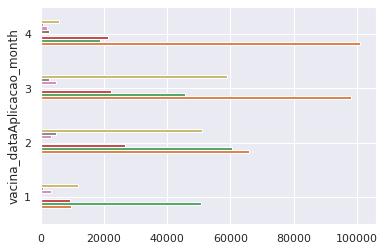

In [90]:
vacina_AM.groupby(['vacina_dataAplicacao_month','vacina_fabricante_nome']).agg({'paciente_id':'count'}).unstack().plot(kind='barh',legend=False)

In [89]:
vacina_AM.paciente_enumSexoBiologico.value_counts(normalize=True)

F    0.543215
M    0.456785
Name: paciente_enumSexoBiologico, dtype: float64

In [100]:
vacina_AM.drop_duplicates(inplace=True)

In [101]:
vacina_AM.groupby(['paciente_id','vacina_descricao_dose']).agg({'document_id': 'count'}).sort_values(by='document_id', ascending=False)

document_id
paciente_id                                        vacina_descricao_dose             
da72b5883d98f5413e002395ef043355660dfed9baa626c...     1ª Dose                      4
8612eae6b248fa7592831fa6187517947e2e4608dbbb7aa...     1ª Dose                      3
cb2ea0571a556809da3fb31795bcce0ce175a4f7f085957...     1ª Dose                      3
9d591d982d1535ce7ce19eea528e96dd69ded070eb047eb...     1ª Dose                      3
5087985c0d7871173d8d3b20454ec91d1d05c60e5f0dd38...     1ª Dose                      3
...                                                                               ...
5588a98988aa55cc79f054210cc55229cb7dda6a12e6d31...     1ª Dose                      1
                                                       2ª Dose                      1
5588e3ebc2a7ed1e8d45b60d6ed28036345e89b7b57fd6d...     1ª Dose                      1
                                                       2ª Dose                      1
fffffdc05eae3c2d6afb6d58cf8267066cdda69c82e3a5b...     2ª Dose                      1

[678402 rows x 1 columns]

In [105]:
vacina_AM[vacina_AM.paciente_id== '8612eae6b248fa7592831fa6187517947e2e4608dbbb7aa9375570416a14d11e']

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_dataAplicacao_date,vacina_dataAplicacao_weekofyear,vacina_dataAplicacao_month
86554,ba215eb5-0bdb-4933-b99b-e500d840842a-i0b0,8612eae6b248fa7592831fa6187517947e2e4608dbbb7a...,37,1983-07-22,M,99,SEM INFORMACAO,130120.0,10.0,COARI,BRASIL,AM,69460.0,B,7098022,MINISTERIO DA SAUDE,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO SOL...,130420,TEFE,AM,926,Outros,9.0,Trabalhadores de Saúde,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-20 03:00:00+00:00,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-04 18:23:03,16341,2021-01-20 03:00:00+00:00,3,1
113717,4305f203-8bc3-4307-9306-ca540c008759-i0b0,8612eae6b248fa7592831fa6187517947e2e4608dbbb7a...,37,1983-07-22,M,99,SEM INFORMACAO,130120.0,10.0,COARI,BRASIL,AM,69460.0,B,2011999,PREFEITURA MUNICIPAL DE COARI,UNIDADE BASICA RIBEIRINHO ENEDINO MONTEIRO,130120,COARI,AM,0,NaN,NaN,NaN,202010025,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-20 00:00:00+00:00,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-02 20:31:21,18602,2021-01-20 00:00:00+00:00,3,1
621692,0d97ebf4-0089-48ed-9823-43fd99bb4d21-i0b0,8612eae6b248fa7592831fa6187517947e2e4608dbbb7a...,37,1983-07-22,M,99,SEM INFORMACAO,130120.0,10.0,COARI,BRASIL,AM,69460.0,B,2011980,PREFEITURA MUNICIPAL DE COARI,UNIDADE BASICA DE SAUDE LUIZ CARLOS HERVAL,130120,COARI,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-20 00:00:00+00:00,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-17 12:02:14,18602,2021-01-20 00:00:00+00:00,3,1
